In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv('../input/onlineretail/OnlineRetail.csv')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

### Drop the Invoice No. column as it is not needed

In [5]:
df.drop(['InvoiceNo'],axis='columns',inplace= True)

### find the basic informations using info() and describe() to understand the dataset better

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   StockCode    541909 non-null  object 
 1   Description  540455 non-null  object 
 2   Quantity     541909 non-null  int64  
 3   InvoiceDate  541909 non-null  object 
 4   UnitPrice    541909 non-null  float64
 5   CustomerID   406829 non-null  float64
 6   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### count of null values in each column

In [8]:
df[df.columns[df.isnull().any()]].isnull().sum()

Description      1454
CustomerID     135080
dtype: int64

## Handling Null Values



### since the values that are null for description are null for both customer id and unitprice and the description has less missing values thus i will drop the rows will missing values in Description feature

In [9]:
df.dropna(subset=['Description','CustomerID'], how='all', inplace= True)

### removing the special characters from descritpion column to make it a little more consistant

In [10]:
df.Description = df.Description.str.replace('\W+', '')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [11]:
df['Description']= df['Description'].str.lower()

### considering the negative quantities as 0 for rfm analysis

In [12]:
df['Quantity']= list(map((lambda x: 0 if(x<0) else x),df['Quantity']))

### creating a new column called price which will quantity x unitprice

In [13]:
df['Price']= df['Quantity'] * df['UnitPrice']

In [14]:
df.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price
0,85123A,whitehanginghearttlightholder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,71053,whitemetallantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,84406B,creamcupidheartscoathanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,84029G,knittedunionflaghotwaterbottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,84029E,redwoollyhottiewhiteheart,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


## Let's derive a separate column for Date from Invoice Date

In [15]:
df['date'] = pd.to_datetime(df['InvoiceDate']).dt.date

In [16]:
df.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price,date
0,85123A,whitehanginghearttlightholder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,71053,whitemetallantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,84406B,creamcupidheartscoathanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,84029G,knittedunionflaghotwaterbottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,84029E,redwoollyhottiewhiteheart,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12-01


## Inorder to fix the date of analysis we will see the date range 

In [17]:
print(df['date'].min(), df['date'].max())

2010-12-01 2011-12-09


#### let's consider the analysis date as 2012-01-01 and lets calculate the recency

In [18]:
df['no_of_days']= (dt.date(2012,1,1))-df['date']

In [19]:
df['no_of_days']= df['no_of_days'].astype('timedelta64[D]')

In [20]:
df.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price,date,no_of_days
0,85123A,whitehanginghearttlightholder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,2010-12-01,396.0
1,71053,whitemetallantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12-01,396.0
2,84406B,creamcupidheartscoathanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,2010-12-01,396.0
3,84029G,knittedunionflaghotwaterbottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12-01,396.0
4,84029E,redwoollyhottiewhiteheart,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12-01,396.0


In [21]:
rfm = df.groupby('CustomerID').agg({'no_of_days': lambda x:x.min(),'CustomerID': lambda x: len(x),'Price': lambda x: x.sum()})     
rfm.rename(columns={'no_of_days': 'recency', 'CustomerID': 'frequency', 'Price': 'monetary'}, inplace=True)

In [22]:
rfm.head() #REMOVE ID FROM INDEX

,recency,frequency,monetary
CustomerID,,,
12346.0,348.0,2.0,77183.60
12347.0,25.0,182.0,4310.00
12348.0,98.0,31.0,1797.24
12349.0,41.0,73.0,1757.55
12350.0,333.0,17.0,334.40


In [23]:
rfm.describe()

,recency,frequency,monetary
count,4372.000000,4372.000000,4372.000000
mean,114.581199,93.053294,2038.290920
std,100.772139,232.471608,8956.019171
min,23.000000,1.000000,0.000000
25%,39.000000,17.000000,303.602500
50%,73.000000,42.000000,665.315000
75%,166.000000,102.000000,1652.790000
max,396.000000,7983.000000,280206.020000


### The scores are given as follows: for frequency and monetary 1 is the lowest and 4 the highest while for recency it is the opposite

### Recency

In [24]:
rfm["recency_score"] = pd.cut(rfm["recency"], bins=[-1,np.percentile(rfm["recency"], 25),np.percentile(rfm["recency"], 50), 
                                             np.percentile(rfm["recency"], 75),rfm["recency"].max()],labels=[4, 3, 2, 1]).astype("int")

### Frequency

In [25]:
rfm["frequency_score"] = pd.cut(rfm["frequency"], bins=[-1,np.percentile(rfm["frequency"], 25),np.percentile(rfm["frequency"], 50), 
                                             np.percentile(rfm["frequency"], 75),rfm["frequency"].max()],labels=[1, 2, 3, 4]).astype("int")

### Monetary

In [26]:
rfm["monetary_score"] = pd.cut(rfm["monetary"], bins=[-1,np.percentile(rfm["monetary"], 25),np.percentile(rfm["monetary"], 50), 
                                             np.percentile(rfm["monetary"], 75),rfm["monetary"].max()],labels=[1, 2, 3, 4])

In [27]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score
CustomerID,,,,,,
12346.0,348.0,2.0,77183.60,1,1,4
12347.0,25.0,182.0,4310.00,4,4,4
12348.0,98.0,31.0,1797.24,2,2,4
12349.0,41.0,73.0,1757.55,3,3,4
12350.0,333.0,17.0,334.40,1,1,2


### Creating RFM class and Customer Segments

In [28]:
rfm['RFMClass']=0
rfm['Customer_Seg']=''

In [29]:
j=0
while j <= (len(rfm)-1):
    rfm['RFMClass'][j]= ((rfm['recency_score'].iloc[j])*100)+((rfm['frequency_score'].iloc[j])*10)+(rfm['monetary_score'].iloc[j])
    j+=1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
from tabulate import tabulate

In [31]:
table= [['R','M','F1','F2','F3','F4'],['4','4','Unsteady','Active','Top customer','Top customer'],[' ','3','Unsteady','Active','Top customer','Top customer'],
       [' ','2','Unsteady','Active','Active','Active'],[' ','1','Unsteady','Active','Active','Active'],['3','4','Unsteady','Emerging','Emerging','Emerging'],
       [' ','3','Unsteady','Emerging','Emerging','Emerging'],[' ','2','Unsteady','Unsteady','Unsteady','Unsteady'],[' ','1','Unsteady','Unsteady','Unsteady','Unsteady'],
       ['2','4','At risk','At risk','At risk','At risk'],[' ',3,'At risk','At risk','At risk','At risk'],[' ','2','Potentially lost','Potentially lost','At risk','At risk'],
       [' ','2','Potentially lost','Potentially lost','At risk','At risk'],[' ','1','Potentially lost','Potentially lost','At risk','At risk'],
       ['1','4','Inactive','Inactive','At risk','At risk'],[' ','3','Inactive','Inactive','At risk','At risk'],[' ','2','Lost','Lost','At risk','At risk'],
       [' ','1','Lost','Lost','At risk','At risk']]
print('Customer Segmentation: ')
print(tabulate(table,headers='firstrow', tablefmt='fancy_grid'))

Customer Segmentation: 
╒═════╤═════╤══════════════════╤══════════════════╤══════════════╤══════════════╕
│ R   │   M │ F1               │ F2               │ F3           │ F4           │
╞═════╪═════╪══════════════════╪══════════════════╪══════════════╪══════════════╡
│ 4   │   4 │ Unsteady         │ Active           │ Top customer │ Top customer │
├─────┼─────┼──────────────────┼──────────────────┼──────────────┼──────────────┤
│     │   3 │ Unsteady         │ Active           │ Top customer │ Top customer │
├─────┼─────┼──────────────────┼──────────────────┼──────────────┼──────────────┤
│     │   2 │ Unsteady         │ Active           │ Active       │ Active       │
├─────┼─────┼──────────────────┼──────────────────┼──────────────┼──────────────┤
│     │   1 │ Unsteady         │ Active           │ Active       │ Active       │
├─────┼─────┼──────────────────┼──────────────────┼──────────────┼──────────────┤
│ 3   │   4 │ Unsteady         │ Emerging         │ Emerging     │ Emergin

In [32]:
k=0
while k <= (len(rfm)-1):
    if rfm['recency_score'].iloc[k]== 4 and rfm['frequency_score'].iloc[k]>=3 and  rfm['monetary_score'].iloc[k]>=3:
        rfm['Customer_Seg'].iloc[k]= 'Top Customers'
    elif rfm['recency_score'].iloc[k]== 4 and rfm['frequency_score'].iloc[k]>=1 and  rfm['monetary_score'].iloc[k]>=1:
        rfm['Customer_Seg'].iloc[k]= 'Active Customers'
    elif rfm['recency_score'].iloc[k]== 3 and rfm['frequency_score'].iloc[k]>=2 and  rfm['monetary_score'].iloc[k]>=3:
        rfm['Customer_Seg'].iloc[k]= 'Emerging Customers'
    elif rfm['recency_score'].iloc[k]>= 3 and rfm['frequency_score'].iloc[k]==1 and  rfm['monetary_score'].iloc[k]>=1:
        rfm['Customer_Seg'].iloc[k]= 'Unsteady Customers'
    elif rfm['recency_score'].iloc[k]== 3 and rfm['frequency_score'].iloc[k]>=2 and  rfm['monetary_score'].iloc[k]<=2:
        rfm['Customer_Seg'].iloc[k]= 'Unsteady Customers'
    elif rfm['recency_score'].iloc[k]== 2 and rfm['frequency_score'].iloc[k]>=1 and  rfm['monetary_score'].iloc[k]>=3:
        rfm['Customer_Seg'].iloc[k]= 'At Risk'
    elif rfm['recency_score'].iloc[k]== 2 and rfm['frequency_score'].iloc[k]>=3 and  rfm['monetary_score'].iloc[k]<=2:
        rfm['Customer_Seg'].iloc[k]= 'At Risk'
    elif rfm['recency_score'].iloc[k]== 1 and rfm['frequency_score'].iloc[k]>=3 and  rfm['monetary_score'].iloc[k]>=1:
        rfm['Customer_Seg'].iloc[k]= 'At Risk'
    elif rfm['recency_score'].iloc[k]== 2 and rfm['frequency_score'].iloc[k]<=2 and  rfm['monetary_score'].iloc[k]<=2:
        rfm['Customer_Seg'].iloc[k]= 'Potentially lost'
    elif rfm['recency_score'].iloc[k]== 1 and rfm['frequency_score'].iloc[k]<=2 and  rfm['monetary_score'].iloc[k]>=3:
        rfm['Customer_Seg'].iloc[k]= 'Inactive Customers'
    elif rfm['recency_score'].iloc[k]== 1 and rfm['frequency_score'].iloc[k]<=2 and  rfm['monetary_score'].iloc[k]<=2:
        rfm['Customer_Seg'].iloc[k]= 'Lost'
    else:
        rfm['Customer_Seg'].iloc[k]= 'Uncategorized'
    k+=1       
       

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [33]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFMClass,Customer_Seg
CustomerID,,,,,,,,
12346.0,348.0,2.0,77183.60,1,1,4,114,Inactive Customers
12347.0,25.0,182.0,4310.00,4,4,4,444,Top Customers
12348.0,98.0,31.0,1797.24,2,2,4,224,At Risk
12349.0,41.0,73.0,1757.55,3,3,4,334,Emerging Customers
12350.0,333.0,17.0,334.40,1,1,2,112,Lost


In [34]:
data = rfm.groupby("Customer_Seg")["RFMClass"].count()
data

Customer_Seg
Active Customers      325
At Risk               793
Emerging Customers    624
Inactive Customers     72
Lost                  805
Potentially lost      479
Top Customers         771
Unsteady Customers    503
Name: RFMClass, dtype: int64

<AxesSubplot:ylabel='RFMClass'>

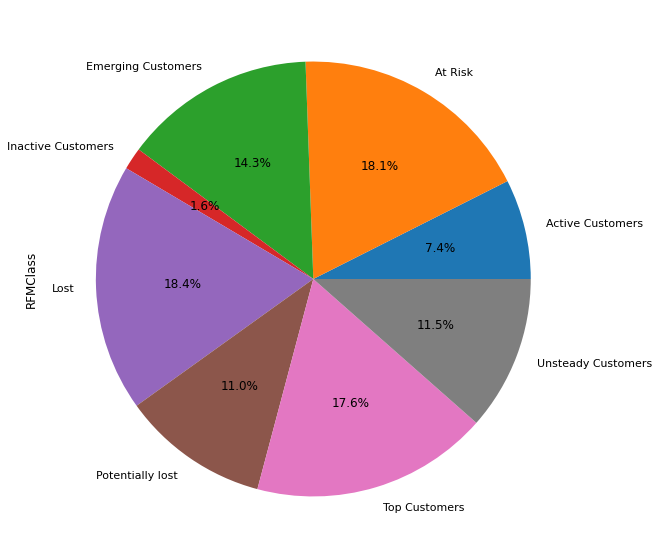

In [35]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.subplots(figsize=(10,10))
data.plot.pie(autopct="%.1f%%")

### Observation:
Significant number of customers have been lost amd are at Risk

[Text(0.5, 0, 'Country'), Text(0, 0.5, 'Sale')]

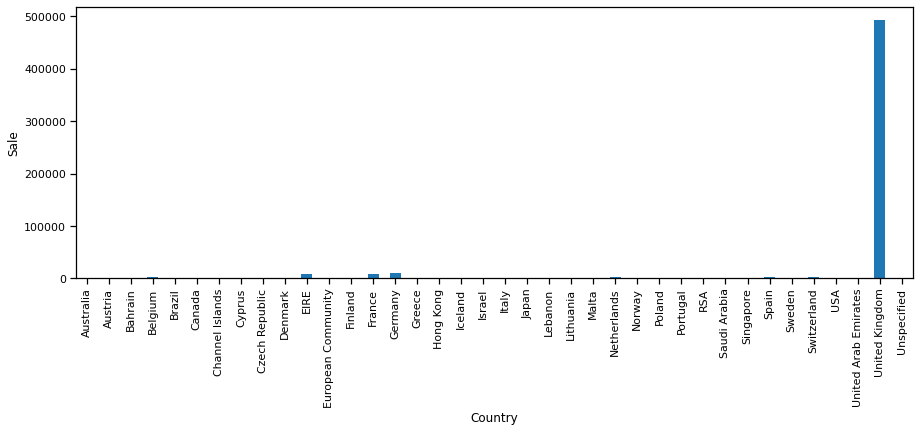

In [36]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.subplots(figsize=(15,5))
a= df.groupby("Country")["Price"].size().plot(kind = "bar")
a.set(xlabel="Country", ylabel = "Sale")

### observation:
Maximum number of transactions have taken place in UK

In [37]:
rfm['monetary_score']=rfm['monetary_score'].astype('int32')

## since the sale is highest in UK thus we can check Uk to analyze the data more details

In [38]:
uk= df[df['Country']=='United Kingdom']

In [39]:
rfm_uk = uk.groupby('CustomerID').agg({'no_of_days': lambda x:x.min(),'CustomerID': lambda x: len(x),'Price': lambda x: x.sum()})     
rfm_uk.rename(columns={'no_of_days': 'recency', 'CustomerID': 'frequency', 'Price': 'monetary'}, inplace=True)

In [40]:
rfm_uk.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,348.0,2.0,77183.60
12747.0,25.0,103.0,4196.01
12748.0,23.0,4642.0,33719.73
12749.0,26.0,231.0,4090.88
12820.0,26.0,59.0,942.34


In [41]:
rfm_uk['monetary']= rfm_uk['monetary'].astype('int')

In [42]:
rfm_uk.describe()

,recency,frequency,monetary
count,3950.000000,3950.000000,3950.000000
mean,114.323038,91.614684,1849.743291
std,100.236848,220.557389,7456.090479
min,23.000000,1.000000,0.000000
25%,39.000000,17.000000,293.000000
50%,73.000000,41.000000,641.500000
75%,166.000000,101.000000,1565.500000
max,396.000000,7983.000000,259657.000000


In [43]:
rfm_uk["recency_score"] = pd.cut(rfm_uk["recency"], bins=[-1,np.percentile(rfm_uk["recency"], 25),np.percentile(rfm_uk["recency"], 50), 
                                             np.percentile(rfm_uk["recency"], 75),rfm_uk["recency"].max()],labels=[4, 3, 2, 1]).astype("int")

In [44]:
rfm_uk["frequency_score"] = pd.cut(rfm_uk["frequency"], bins=[-1,np.percentile(rfm_uk["frequency"], 25),np.percentile(rfm_uk["frequency"], 50), 
                                             np.percentile(rfm_uk["frequency"], 75),rfm_uk["frequency"].max()],labels=[1, 2, 3, 4]).astype("int")

In [45]:
rfm_uk["monetary_score"] = pd.cut(rfm_uk["monetary"], bins=[-1,np.percentile(rfm_uk["monetary"], 25),np.percentile(rfm_uk["monetary"], 50), 
                                             np.percentile(rfm_uk["monetary"], 75),rfm_uk["monetary"].max()],labels=[1, 2, 3, 4])

In [46]:
rfm_uk

,recency,frequency,monetary,recency_score,frequency_score,monetary_score
CustomerID,,,,,,
12346.0,348.0,2.0,77183,1,1,4
12747.0,25.0,103.0,4196,4,4,4
12748.0,23.0,4642.0,33719,4,4,4
12749.0,26.0,231.0,4090,4,4,4
12820.0,26.0,59.0,942,4,3,3
...,...,...,...,...,...,...
18280.0,300.0,10.0,180,1,1,1
18281.0,203.0,7.0,80,1,1,1
18282.0,30.0,13.0,178,4,1,1


In [47]:
rfm_uk['RFMClass']=0
rfm_uk['Customer_Seg']=''

In [48]:
j=0
while j <= (len(rfm_uk)-1):
    rfm_uk['RFMClass'][j]= ((rfm_uk['recency_score'].iloc[j])*100)+((rfm_uk['frequency_score'].iloc[j])*10)+(rfm_uk['monetary_score'].iloc[j])
    j+=1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
k=0
while k <= (len(rfm_uk)-1):
    if rfm_uk['recency_score'].iloc[k]== 4 and rfm_uk['frequency_score'].iloc[k]>=3 and  rfm_uk['monetary_score'].iloc[k]>=3:
        rfm_uk['Customer_Seg'].iloc[k]= 'Top Customers'
    elif rfm_uk['recency_score'].iloc[k]== 4 and rfm_uk['frequency_score'].iloc[k]>=1 and  rfm_uk['monetary_score'].iloc[k]>=1:
        rfm_uk['Customer_Seg'].iloc[k]= 'Active Customers'
    elif rfm_uk['recency_score'].iloc[k]== 3 and rfm_uk['frequency_score'].iloc[k]>=2 and  rfm_uk['monetary_score'].iloc[k]>=3:
        rfm_uk['Customer_Seg'].iloc[k]= 'Emerging Customers'
    elif rfm_uk['recency_score'].iloc[k]>= 3 and rfm_uk['frequency_score'].iloc[k]==1 and  rfm_uk['monetary_score'].iloc[k]>=1:
        rfm_uk['Customer_Seg'].iloc[k]= 'Unsteady Customers'
    elif rfm_uk['recency_score'].iloc[k]== 3 and rfm_uk['frequency_score'].iloc[k]>=2 and  rfm_uk['monetary_score'].iloc[k]<=2:
        rfm_uk['Customer_Seg'].iloc[k]= 'Unsteady Customers'
    elif rfm_uk['recency_score'].iloc[k]== 2 and rfm_uk['frequency_score'].iloc[k]>=1 and  rfm_uk['monetary_score'].iloc[k]>=3:
        rfm_uk['Customer_Seg'].iloc[k]= 'At Risk'
    elif rfm_uk['recency_score'].iloc[k]== 2 and rfm_uk['frequency_score'].iloc[k]>=3 and  rfm_uk['monetary_score'].iloc[k]<=2:
        rfm_uk['Customer_Seg'].iloc[k]= 'At Risk'
    elif rfm_uk['recency_score'].iloc[k]== 1 and rfm_uk['frequency_score'].iloc[k]>=3 and  rfm_uk['monetary_score'].iloc[k]>=1:
        rfm_uk['Customer_Seg'].iloc[k]= 'At Risk'
    elif rfm_uk['recency_score'].iloc[k]== 2 and rfm_uk['frequency_score'].iloc[k]<=2 and  rfm_uk['monetary_score'].iloc[k]<=2:
        rfm_uk['Customer_Seg'].iloc[k]= 'Potentially lost'
    elif rfm_uk['recency_score'].iloc[k]== 1 and rfm_uk['frequency_score'].iloc[k]<=2 and  rfm_uk['monetary_score'].iloc[k]>=3:
        rfm_uk['Customer_Seg'].iloc[k]= 'Inactive Customers'
    elif rfm_uk['recency_score'].iloc[k]== 1 and rfm_uk['frequency_score'].iloc[k]<=2 and  rfm_uk['monetary_score'].iloc[k]<=2:
        rfm_uk['Customer_Seg'].iloc[k]= 'Lost'
    else:
        rfm_uk['Customer_Seg'].iloc[k]= 'Uncategorized'
    k+=1       
       

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [50]:
rfm_uk['monetary_score']=rfm_uk['monetary_score'].astype('int32')

In [51]:
rfm_uk.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3950 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   recency          3950 non-null   float64
 1   frequency        3950 non-null   float64
 2   monetary         3950 non-null   int64  
 3   recency_score    3950 non-null   int64  
 4   frequency_score  3950 non-null   int64  
 5   monetary_score   3950 non-null   int32  
 6   RFMClass         3950 non-null   int64  
 7   Customer_Seg     3950 non-null   object 
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 391.3+ KB


In [52]:
data1 = rfm_uk.groupby("Customer_Seg")["RFMClass"].count()
data1

Customer_Seg
Active Customers      294
At Risk               720
Emerging Customers    575
Inactive Customers     67
Lost                  722
Potentially lost      428
Top Customers         695
Unsteady Customers    449
Name: RFMClass, dtype: int64

<AxesSubplot:ylabel='RFMClass'>

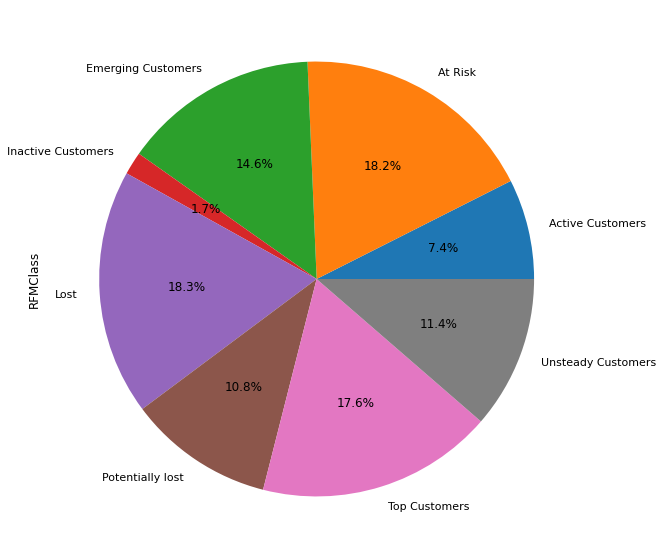

In [53]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.subplots(figsize=(10,10))
data1.plot.pie(autopct="%.1f%%")

<AxesSubplot:xlabel='Customer_Seg', ylabel='monetary'>

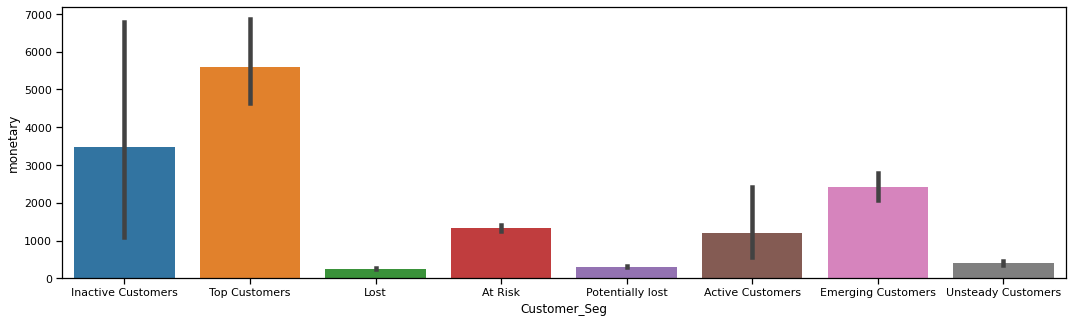

In [54]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.subplots(figsize=(18,5))
sns.barplot(y='monetary',x= 'Customer_Seg',data= rfm_uk)